<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/BAM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# BAM model
class BAM(object):
    def __init__(self, data):
        self.pairs = data
        m1 = len(self.pairs[0][1])
        m2 = len(self.pairs[0][0])
        # create weight matrix
        self.W = np.zeros((m2,m1))
        for p in self.pairs:
          X = p[0]
          Y = p[1]
          self.W += np.outer(X, Y)

    def get_assoc(self, A):
        A = np.asarray(A)
        y=np.dot(A.T,self.W)
        y[y<0]=-1
        y[y>=0]=1
        return y

  
# Utility funcitons
import matplotlib.pyplot as plt

def print_formatted(row_list,col_list , mat):
  row_format ="{:>10}" * (len(col_list) + 1)
  print(row_format.format("", *col_list))
  for item, row in zip(row_list, mat):
      print(row_format.format(item, *row))

def draw_img(ax, X):
  ax.imshow(np.reshape(X,[5,3]))
  
def make_test_data (true_data, max_samples, n_noise, noise_type = 0): 
  test_data = []
  while len(test_data) < max_samples:
    if n_noise > 0:
      rnd = random.sample(range(len(true_data)), n_noise)
      noisy_data = np.asarray(true_data)
      for i in rnd:
        noisy_data[i] = noise_type if noise_type < 2  else -1 *noisy_data[i]      
      test_data.append(noisy_data)
    else:
      test_data.append(true_data)
      
  test_data=np.asarray(test_data)
  test_data = np.unique(test_data,axis=0)
  return test_data




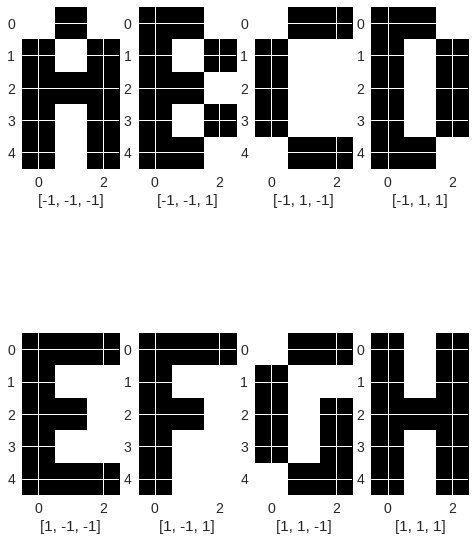

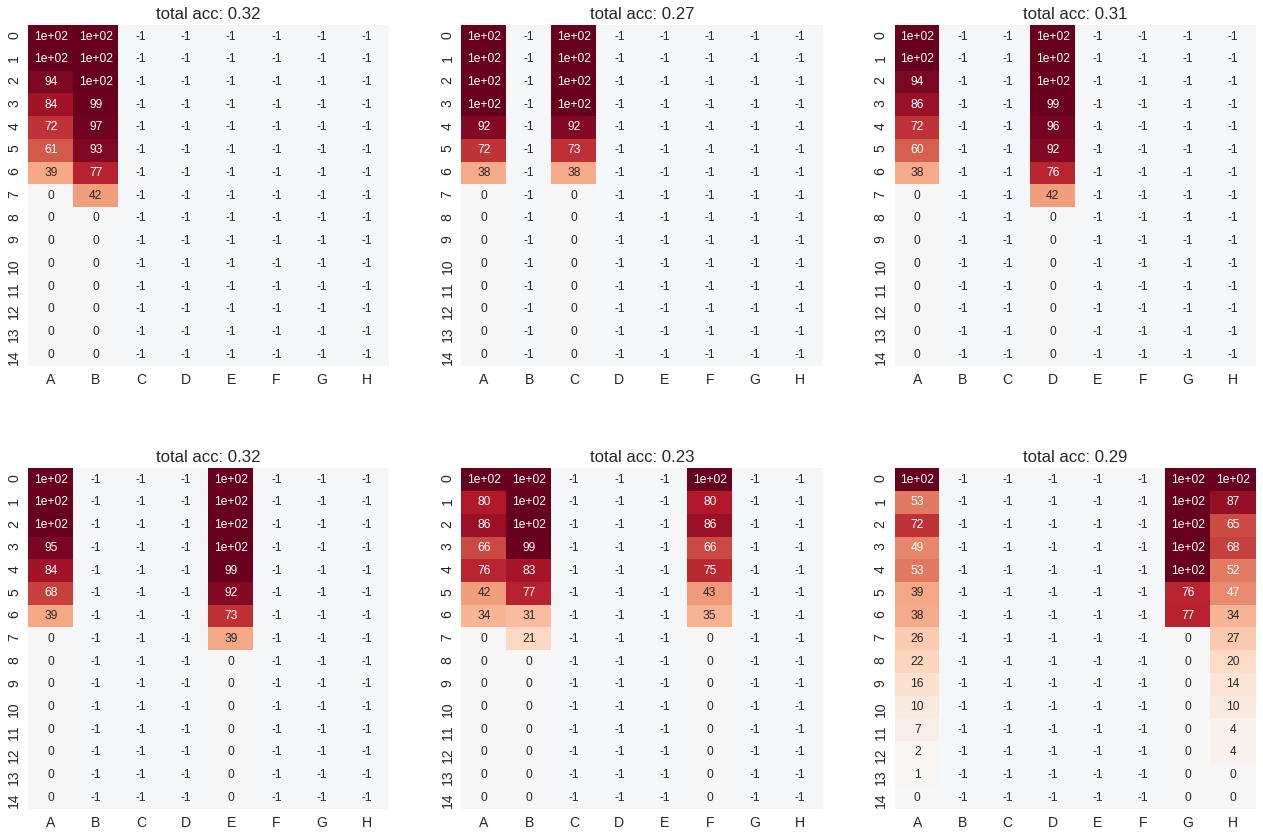

In [0]:
import numpy as np
import random
import seaborn as sn
import pandas  as pd

A = [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tA = [-1, -1,-1] 
B = [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB = [-1, -1, 1]
C = [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC = [-1,1,-1] 
D = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1]
tD = [-1,1,1]
E = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE = [1,-1,-1]
F =[1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
tF = [1, -1, 1]
G = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1]
tG = [1, 1, -1]
H = [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tH = [1, 1, 1]

# tA = [-1, 1] 
# tC = [1, 1] 
letters ={"A" : A,"B" : B, "C" : C,"D":D, "E":E,"F":F,"G":G,"H":H}
targets ={"A" : tA,"B": tB, "C" : tC, "D" : tD, 
           "E" : tE,"F": tF, "G" : tG, "H" : tH}

#Draw Images
fig = plt.figure(figsize = (8,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

i = 0
for key, value in letters.items():
  ax = fig.add_subplot(2,4,i+1)
  draw_img(ax, value)
  xlabel = targets[key]; 
  ax.set_xlabel(xlabel)
  i+=1
plt.show()
  
# Create various datesets
ds=[]

ds.append(dict((k, letters[k]) for k in ('A', 'B'))) #0
ds.append(dict((k, letters[k]) for k in ('A', 'C')))
ds.append(dict((k, letters[k]) for k in ('A','D')))

ds.append(dict((k, letters[k]) for k in ('A','E'))) #3
ds.append(dict((k, letters[k]) for k in ('A','F','B')))

ds.append(dict((k, letters[k]) for k in ('A','G','H'))) 
ds.append(dict((k, letters[k]) for k in ('F','G','H')))

ds.append(dict((k, letters[k]) for k in ('A','B','C', 'D','E','F','G','H'))) #7


let_list = [v for v in letters.keys()]


ds_index = 0

fig = plt.figure(figsize = (22,40))
plt.subplots_adjust(hspace=0.3,bottom=0.3)

for data in ds[:6]:
  
#   print(data.keys())
  pairs = []

  for key,value in data.items():
    y = targets[key]
    pairs.append([value, y])

  bam = BAM(pairs)
  
  
  max_distort = 15
    

  tot = 0
  yy = 0
  dt = 2
  ii=0
  acc_mat = np.full((max_distort, 8),-1.0)
  for distort in range(max_distort):
    for key,letter in data.items():
      target = targets[key]
      test_data=make_test_data(letter, 1000, distort, dt)
      n_samples = len(test_data)
#       ax = fig.add_subplot(4,8, ii+1)
# #       print(f"len test data {distort}:", n_samples)
#       ax.set_title(f"number of noisy pixels: {distort}")
#       for i in range(min(n_samples,5)):
#         draw_img(ax,test_data[i])
      success = 0
      for i,noisy_data in enumerate(test_data):
        predicted = bam.get_assoc(noisy_data)
        if np.array_equal(target, predicted):
          success +=1

#       print(f"Accuracy of {key}= {success}")
      let_index = let_list.index(key)
      acc_mat[distort, let_index] = round(success / n_samples,2)*100
      tot += success
      yy += n_samples
      ii+=1
  

#   print("Accuracy matrix: rows: distortion, columns: letters")
#   print_formatted(range(len(ds)), let_list, acc_mat)
    # Visualizing of Hamming Distance

  df_hammY = pd.DataFrame(acc_mat, range(max_distort),range(len(let_list)))
  axlabels = range(max_distort)


  ax = fig.add_subplot(4,3,ds_index+1) #plt.subplot2grid((10,2),(ds_index, ds_index % 2), colspan=1)
  ax.set_title(f"total acc: {np.round(tot / yy,2)}")
  ax.set_xlabel("Noise")
  ax.set_ylabel("Letter")

  sn.set(font_scale=1.4)#for label size
  sn.heatmap(df_hammY, annot=True,annot_kws={"size": 12}, xticklabels=let_list, yticklabels=axlabels,cbar=False)# font size

  ds_index+=1

plt.show()  
